In [24]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
table = Table.read("ch2_xsm_20201011_v1_level2.lc")

In [26]:
print (table)

       TIME           RATE     ERROR   FRACEXP
        s            ct / s   counts/s        
------------------ --------- --------- -------
119145600.63823438  45.13309 6.7181168     1.0
119145601.63823438 54.538513 7.3850193     1.0
119145602.63823438  51.21651 7.1565714     1.0
119145603.63823438 62.099392 7.8803167     1.0
119145604.63823438  60.82958  7.799332     1.0
119145605.63823438  45.02195   6.70984     1.0
119145606.63823438 47.432304 6.8871117     1.0
119145607.63823438 48.801304  6.985793     1.0
119145608.63823438 60.395603  7.771461     1.0
119145609.63823438  47.47057  6.889889     1.0
               ...       ...       ...     ...
119231989.63823438 37.569527 6.1293983     1.0
119231990.63823438  51.81679  7.198388     1.0
119231991.63823438 44.616997 6.6795955     1.0
119231992.63823438   45.8423 6.7706943     1.0
119231993.63823438 43.364677  6.585186     1.0
119231994.63823438  48.23385 6.9450593     1.0
119231995.63823438 42.154224 6.4926286     1.0
119231996.638

In [27]:
time = table["TIME"]
rate = table["RATE"]
print(time)
print(rate)

       TIME       
        s         
------------------
119145600.63823438
119145601.63823438
119145602.63823438
119145603.63823438
119145604.63823438
119145605.63823438
119145606.63823438
119145607.63823438
119145608.63823438
119145609.63823438
               ...
119231989.63823438
119231990.63823438
119231991.63823438
119231992.63823438
119231993.63823438
119231994.63823438
119231995.63823438
119231996.63823438
119231997.63823438
119231998.63823438
Length = 84095 rows
   RATE  
  ct / s 
---------
 45.13309
54.538513
 51.21651
62.099392
 60.82958
 45.02195
47.432304
48.801304
60.395603
 47.47057
      ...
37.569527
 51.81679
44.616997
  45.8423
43.364677
 48.23385
42.154224
 47.36441
60.513912
 38.68136
Length = 84095 rows


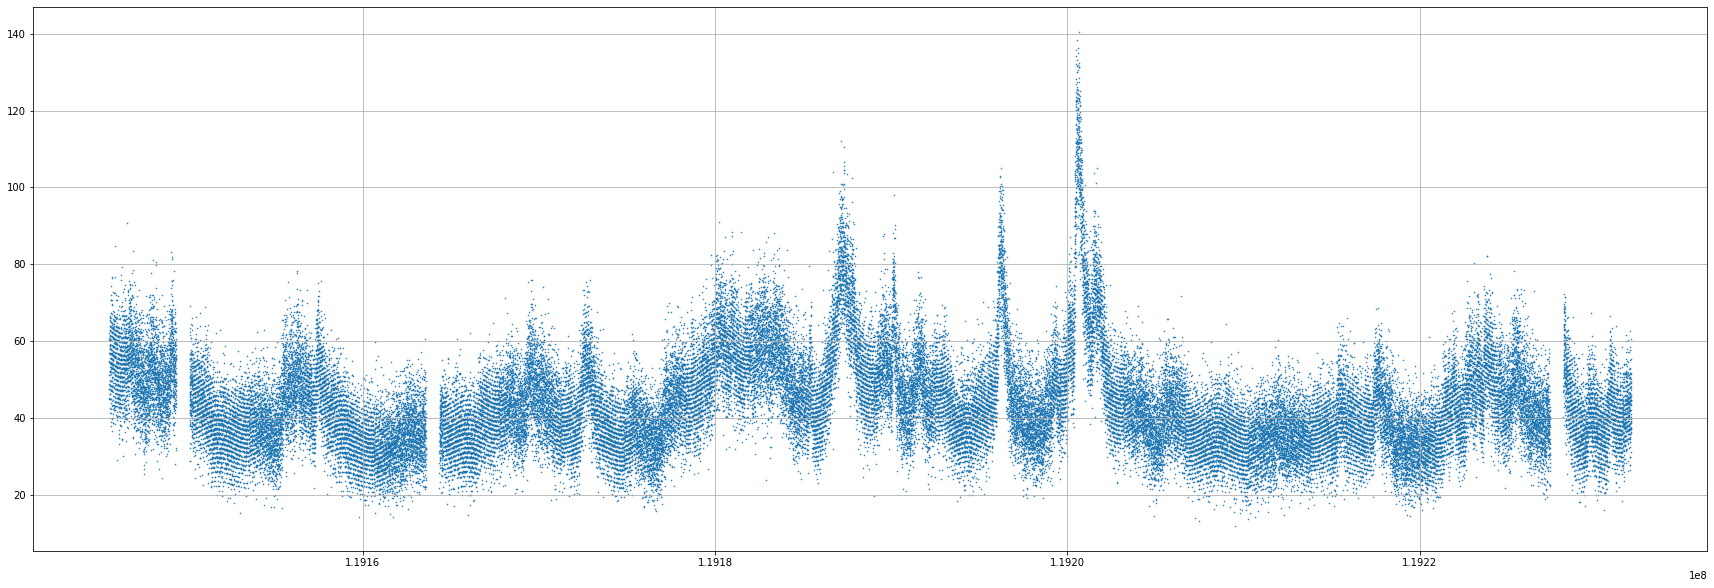

In [28]:
plt.figure(figsize = (30,10))
plt.scatter(time, rate,s=0.3)
plt.grid()
plt.show()

In [29]:
print(time)
time = [int(i - time[0]) for i in time]

       TIME       
        s         
------------------
119145600.63823438
119145601.63823438
119145602.63823438
119145603.63823438
119145604.63823438
119145605.63823438
119145606.63823438
119145607.63823438
119145608.63823438
119145609.63823438
               ...
119231989.63823438
119231990.63823438
119231991.63823438
119231992.63823438
119231993.63823438
119231994.63823438
119231995.63823438
119231996.63823438
119231997.63823438
119231998.63823438
Length = 84095 rows


In [30]:
for i in range(len(time)-1):
    if(time[i+1]-time[i]>1):
        print(i, "\t", time[i+1]-time[i])

250 	 2
256 	 2
257 	 2
259 	 2
260 	 2
262 	 2
263 	 2
267 	 2
3783 	 765
17201 	 766
19994 	 2
80249 	 767


In [31]:
t1 = [90000]
r1 = []
i=0
j=0
# while (j<len(time)+16 and i<(len(time)-2)):
#     if(time[i+1]-time[i]==2):
#         r1[j] = (r1[i] + r1[i+1])/2
#         t1[j] = time[i]+1
#         j = j+1
#         print(j)
#     else:
#         t1[j] = time[i]
#         r1[j] = rate[i]
#         j=j+1
# print(r1)

In [32]:
t1 = []
r1 = []
for i in range (len(time)-1):
    t1.append(time[i])
    r1.append(rate[i])
    if(time[i+1]-time[i]==2):
        t1.append(time[i]+1)
        r1.append((rate[i]+rate[i+1])/2)

In [33]:
for i in range(len(t1)-1):
    if(t1[i+1]-t1[i]>1):
        print(t1[i+1]-t1[i])

765
766
767


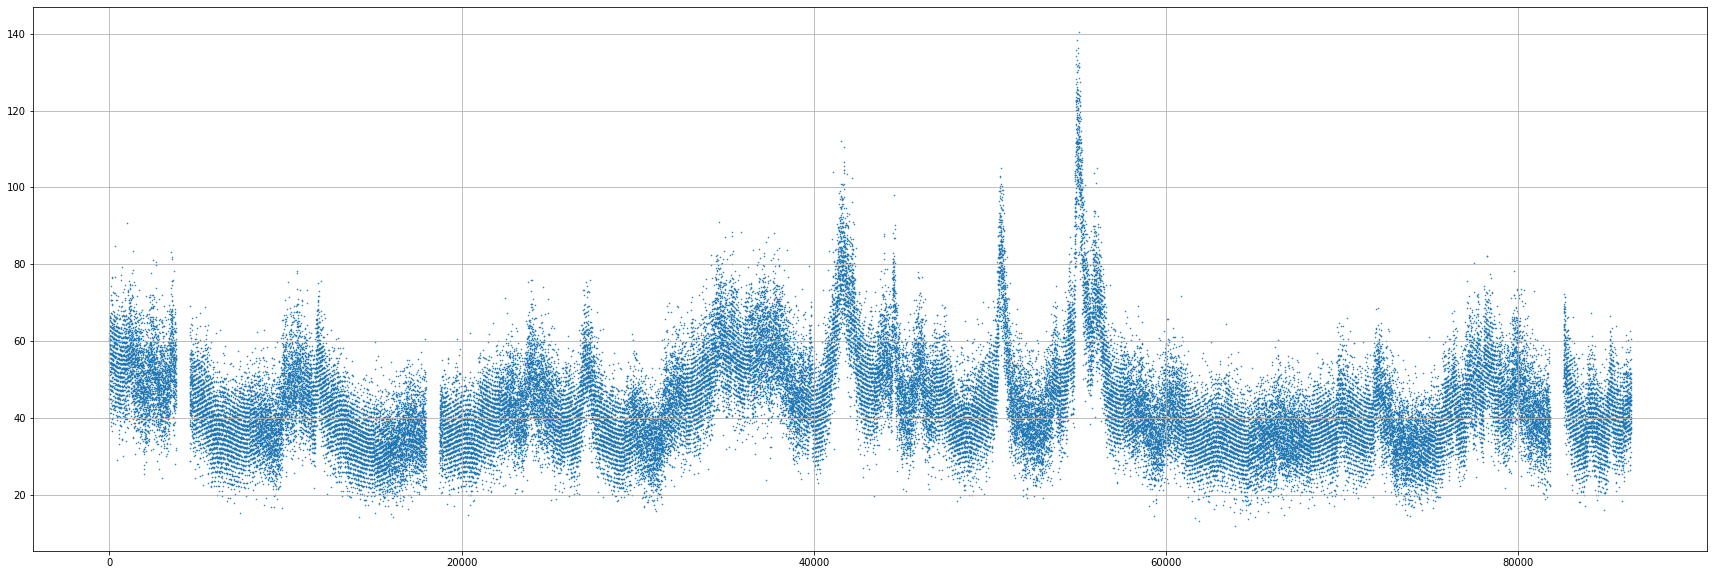

In [34]:
plt.figure(figsize = (30,10))
plt.scatter(t1, r1,s=0.3)
plt.grid()
plt.show()

In [35]:
# t_dash = []
# r_dash = []
# i=0

# while(i<len(t1)):
#     x=[]
#     y=[]
#     for j in range(i,len(t1)-1):
#         if(t1[j+1]-t1[j]>1):
#             i=j
#             break
#         x.append(t1[j])
#         y.append(r1[j])
#     print(len(x), len(y))
#     t_dash.append(x)
#     r_dash.append(y)
#     i=i+1
# print(len(t_dash))
# print(len(r_dash))

In [36]:
s = []
e = []
s.append(0)
for i in range(1, len(t1)):
    if(t1[i]-t1[i-1]>1):
        e.append(i)
        s.append(i)
e.append(len(t1))
print(len(s), len(e))

4 4


In [37]:
t_dash = []
r_dash = []

for i in range(len(s)):
    x = []
    y = []
    for j in range(s[i], e[i]):
        x.append(t1[j])
        y.append(r1[j])
    t_dash.append(x)
    r_dash.append(y)

print(len(t_dash))
print(len(r_dash))

4
4


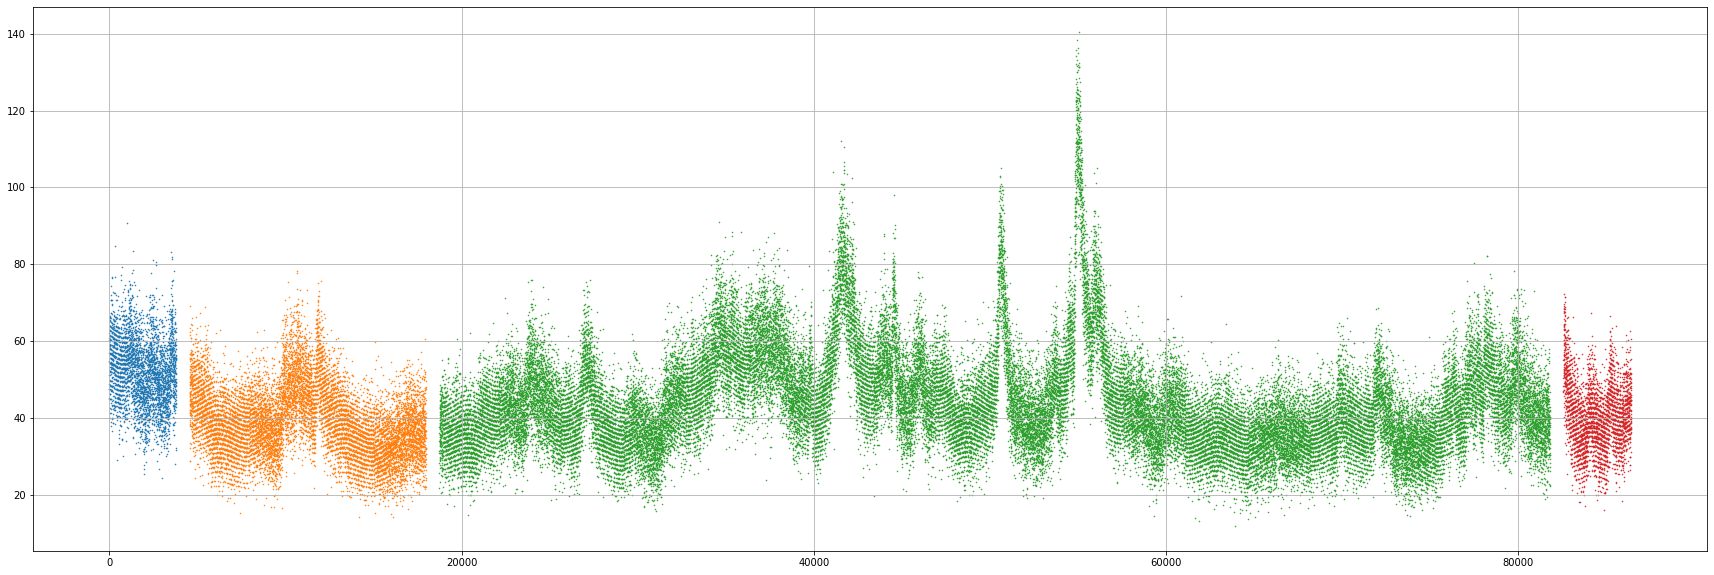

In [38]:
plt.figure(figsize = (30,10))
for i in range(4):
    plt.scatter(t_dash[i], r_dash[i], s=0.3)
plt.grid()
plt.show()

In [39]:
from scipy.interpolate import interp1d

In [40]:
t3 = []
r3 = []
for i in range(len(t_dash)):
    x = t_dash[i]
    y = r_dash[i]
    if(len(x)>=250):
        w_size = int(250/(1+(np.exp(-len(x)+250))))
        shift = w_size//2
        norm = []
        norm_dp = []
        norm_dp.append(np.mean(y[0:w_size]))
        norm.append(x[0])

        for j in range(w_size, len(y), shift):
            norm_dp.append(np.mean(y[j:j+shift]))
            norm.append(x[j])
        
        norm_dp = np.array(norm_dp)
        norm = np.array(norm)
        x_new = np.linspace(x[0], x[0]+len(x), x[0]+len(x))
        
        func = interp1d(norm, norm_dp, fill_value='extrapolate', kind = 'linear')
        y_new = func(x_new)

        t3.append(x_new)
        r3.append(y_new)

In [41]:
print(len(t3))
print(len(r3))

4
4


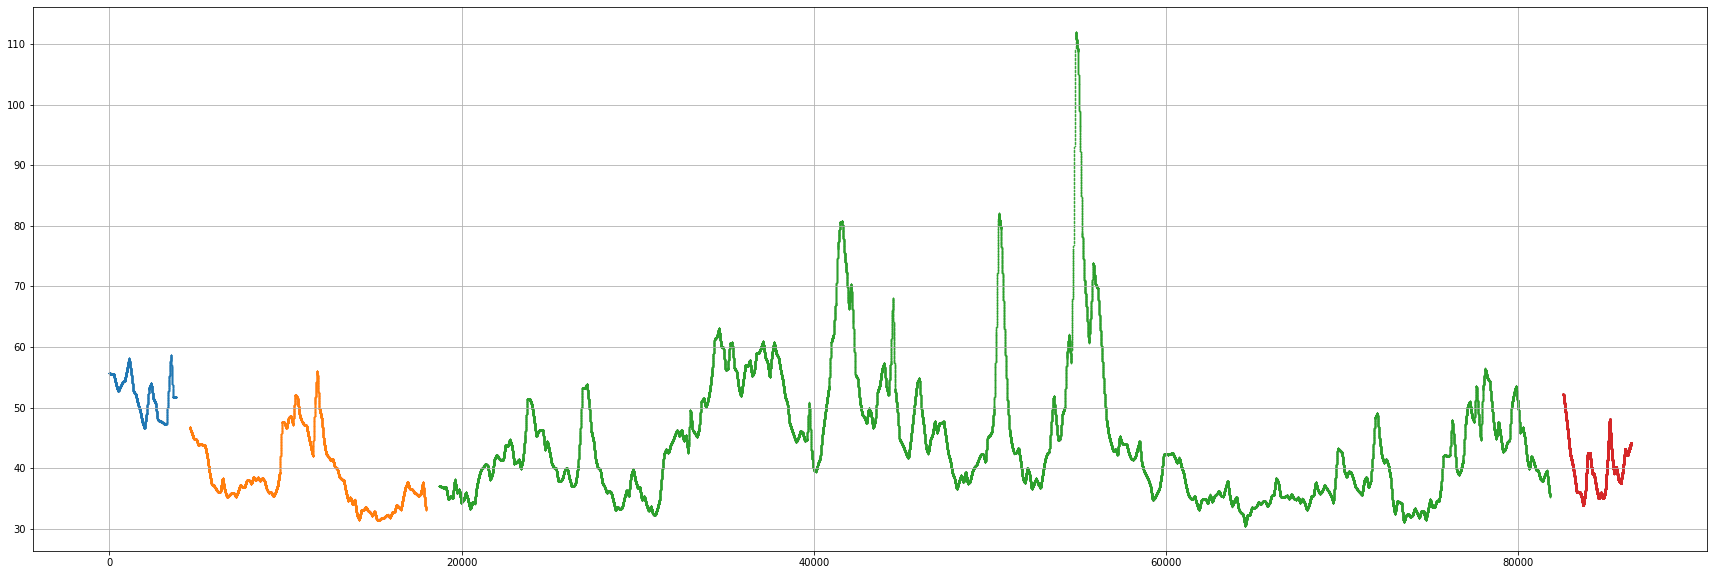

In [42]:
plt.figure(figsize = (30,10))
for i in range(4):
    plt.scatter(t3[i], r3[i], s=0.3)
plt.grid()
plt.show()

In [43]:
x_interp = []
y_interp = []

for i in range(len(t3)):
    for j in range(len(t3[i])):
        x_interp.append(t3[i][j])
        y_interp.append(r3[i][j])

final_time = np.linspace(int(x_interp[0]), int(x_interp[-1]-x_interp[0]), int(x_interp[-1] -x_interp[0]))

f = interp1d(x_interp, y_interp, fill_value='extrapolate', kind = 'linear')

final_rate = f(final_time)

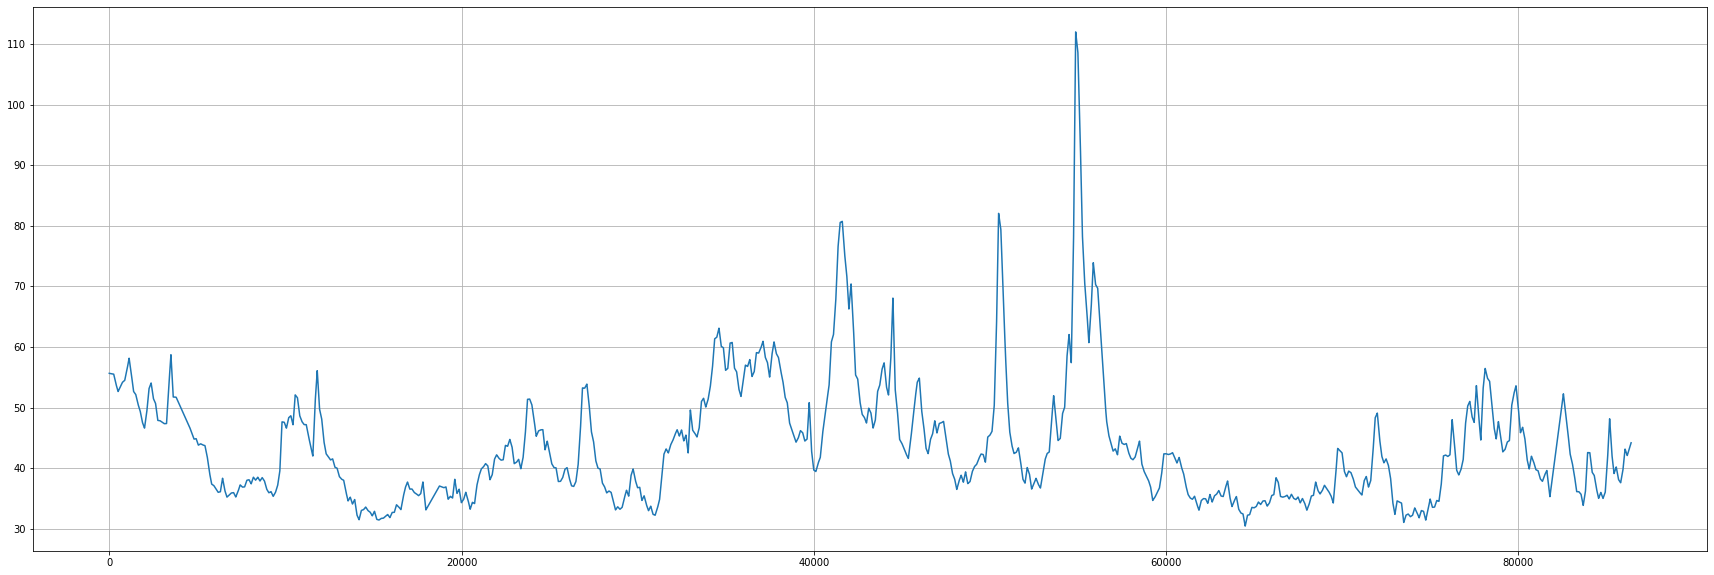

In [44]:
plt.figure(figsize = (30,10))
plt.plot(final_time, final_rate)
plt.grid()
plt.show()